# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [1]:
from IPython.display import clear_output

In [2]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [3]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [46]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2018-01-01' #'2015-01-01'
end_date = '2020-12-31'   #'2022-07-12'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


TOP_NIFTY_2024 = [
    "POWERGRID.NS",      # Power Finance Corporation
    "RECLTD.NS",         # REC Limited
    "INDHOTEL.NS",       # Indian Hotels Company
    "COFORGE.NS",        # Coforge Limited
    "PERSISTENT.NS",     # Persistent Systems
    "AUBANK.NS",         # AU Small Finance Bank
    "FEDERALBNK.NS",     # Federal Bank
    "IDFCFIRSTB.NS",     # IDFC First Bank
    "EXIDEIND.NS",        # HDFC Asset Management
    "LUPIN.NS"           # Lupin Limited
]

# Get the data
data = yf.download(TOP_NIFTY_2024, start_date, end_date)
data

/tmp/ipython-input-3044463654.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TOP_NIFTY_2024, start_date, end_date)
[*********************100%***********************]  10 of 10 completed


Price            Close                                                      \
Ticker       AUBANK.NS  COFORGE.NS EXIDEIND.NS FEDERALBNK.NS IDFCFIRSTB.NS   
Date                                                                         
2018-01-01  329.147552  119.300713  203.606903    101.375465     53.558350   
2018-01-02  328.427521  117.247879  205.413620    100.349579     52.679543   
2018-01-03  332.573822  117.868294  206.942444    100.442833     52.874832   
2018-01-04  335.180817  119.182114  205.784286    101.328842     53.265411   
2018-01-05  347.321747  122.165527  210.416962    104.546364     56.878281   
...                ...         ...         ...           ...           ...   
2020-12-23  432.213531  495.391144  178.482758     61.414623     35.782883   
2020-12-24  431.765717  499.221130  176.462189     62.322689     35.782883   
2020-12-28  425.994629  506.438721  179.300613     64.425613     36.829456   
2020-12-29  422.114014  504.481323  184.111481     64.425613     36.580269   
2020-12-30  424.104095  507.135040  184.111481     64.282227     36.530434   

Price                                                                     ...  \
Ticker     INDHOTEL.NS    LUPIN.NS PERSISTENT.NS POWERGRID.NS  RECLTD.NS  ...   
Date                                                                      ...   
2018-01-01  111.935066  843.753418    325.585815    75.337112  62.726242  ...   
2018-01-02  111.935066  836.015625    324.373688    75.544075  62.429237  ...   
2018-01-03  114.627159  839.645752    318.358704    75.882751  62.508419  ...   
2018-01-04  118.925102  838.881470    324.076385    75.393555  64.132034  ...   
2018-01-05  125.442825  859.897766    329.153687    75.732239  63.934017  ...   
...                ...         ...           ...          ...        ...  ...   
2020-12-23  119.460320  938.019470    698.133789    83.375046  68.509819  ...   
2020-12-24  116.111420  950.531616    695.733765    83.396980  69.522293  ...   
2020-12-28  117.642349  957.883118    706.965759    84.077332  70.353020  ...   
2020-12-29  117.163933  951.553955    715.221741    83.265312  70.171303  ...   
2020-12-30  116.589828  951.894836    735.549683    83.484764  68.847298  ...   

Price         Volume                                                     \
Ticker     AUBANK.NS COFORGE.NS EXIDEIND.NS FEDERALBNK.NS IDFCFIRSTB.NS   
Date                                                                      
2018-01-01    185152    1066295      756083       2320304       4483875   
2018-01-02    259520    1976870     1773843       3315889       4912922   
2018-01-03    241292    1551260     2078634       2894282       3088116   
2018-01-04    224020    1383870      752325       9282382       3665726   
2018-01-05    511032    2123295     1687260      11491142      24488254   
...              ...        ...         ...           ...           ...   
2020-12-23   2601826    3893420     4222883      34846873      20477842   
2020-12-24   1586958    3010900     3476114      27730531      18306842   
2020-12-28    981228    2174530     2166245      28813310      22885983   
2020-12-29   2171508    1667085     6281707      29998634      18963239   
2020-12-30   1182792    1200675     5451885      19496396      19633682   

Price                                                                 
Ticker     INDHOTEL.NS LUPIN.NS PERSISTENT.NS POWERGRID.NS RECLTD.NS  
Date                                                                  
2018-01-01      456562  1032734        203048      6388017   6061265  
2018-01-02     1976901  1199522        436816      4383705   4650711  
2018-01-03     1761802  3960088        107402      8187397   3457506  
2018-01-04     5176843  1924978        493790      4204055   6112743  
2018-01-05     3523339  2694063        764774      4923559   5400301  
...                ...      ...           ...          ...       ...  
2020-12-23     2505380  2054965       1089322      9836093   5673831  
2020-12-24 

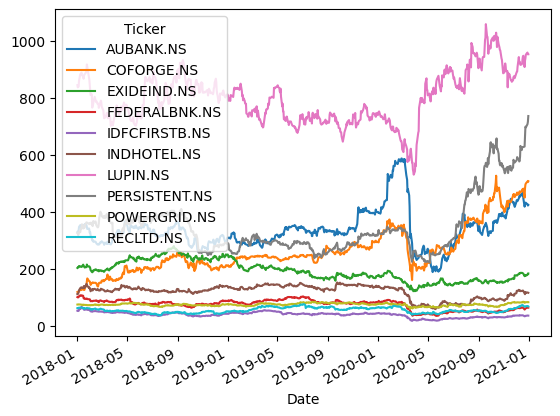

In [47]:
# Plot adjusted close price data
data['Close'].plot()
plt.show()

In [48]:
# Closing price
data = data['Close']
data

Ticker,AUBANK.NS,COFORGE.NS,EXIDEIND.NS,FEDERALBNK.NS,IDFCFIRSTB.NS,INDHOTEL.NS,LUPIN.NS,PERSISTENT.NS,POWERGRID.NS,RECLTD.NS
Date,,,,,,,,,,
2018-01-01,329.147552,119.300713,203.606903,101.375465,53.558350,111.935066,843.753418,325.585815,75.337112,62.726242
2018-01-02,328.427521,117.247879,205.413620,100.349579,52.679543,111.935066,836.015625,324.373688,75.544075,62.429237
2018-01-03,332.573822,117.868294,206.942444,100.442833,52.874832,114.627159,839.645752,318.358704,75.882751,62.508419
2018-01-04,335.180817,119.182114,205.784286,101.328842,53.265411,118.925102,838.881470,324.076385,75.393555,64.132034
2018-01-05,347.321747,122.165527,210.416962,104.546364,56.878281,125.442825,859.897766,329.153687,75.732239,63.934017
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,432.213531,495.391144,178.482758,61.414623,35.782883,119.460320,938.019470,698.133789,83.375046,68.509819
2020-12-24,431.765717,499.221130,176.462189,62.322689,35.782883,116.111420,950.531616,695.733765,83.396980,69.522293
2020-12-28,425.994629,506.438721,179.300613,64.425613,36.829456,117.642349,957.883118,706.965759,84.077332,70.353020


<Axes: xlabel='Ticker'>

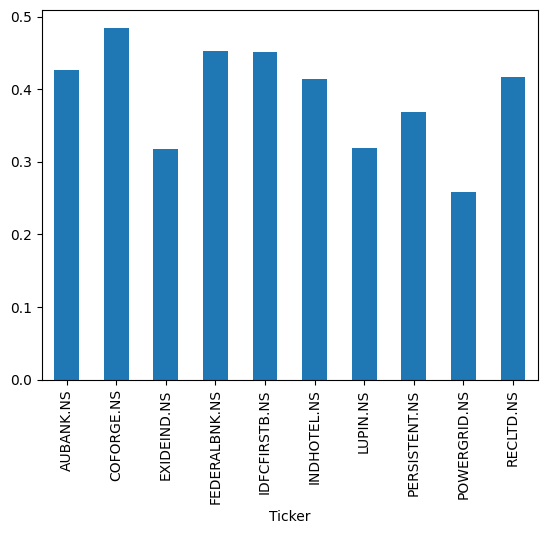

In [49]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

## Process on all dataset


In [50]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AUBANK.NS,COFORGE.NS,EXIDEIND.NS,FEDERALBNK.NS,IDFCFIRSTB.NS,INDHOTEL.NS,LUPIN.NS,PERSISTENT.NS,POWERGRID.NS,RECLTD.NS
Ticker,,,,,,,,,,
AUBANK.NS,0.000729,0.000097,0.000140,0.000292,0.000262,0.000235,0.000060,0.000092,0.000109,0.000215
COFORGE.NS,0.000097,0.000941,0.000164,0.000278,0.000300,0.000188,0.000103,0.000234,0.000090,0.000223
EXIDEIND.NS,0.000140,0.000164,0.000405,0.000261,0.000228,0.000192,0.000104,0.000078,0.000079,0.000173
FEDERALBNK.NS,0.000292,0.000278,0.000261,0.000822,0.000489,0.000325,0.000104,0.000136,0.000146,0.000339
IDFCFIRSTB.NS,0.000262,0.000300,0.000228,0.000489,0.000814,0.000289,0.000110,0.000155,0.000128,0.000372
INDHOTEL.NS,0.000235,0.000188,0.000192,0.000325,0.000289,0.000686,0.000033,0.000104,0.000075,0.000211
LUPIN.NS,0.000060,0.000103,0.000104,0.000104,0.000110,0.000033,0.000408,0.000044,0.000065,0.000102
PERSISTENT.NS,0.000092,0.000234,0.000078,0.000136,0.000155,0.000104,0.000044,0.000543,0.000015,0.000088
POWERGRID.NS,0.000109,0.000090,0.000079,0.000146,0.000128,0.000075,0.000065,0.000015,0.000268,0.000128


In [51]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

/tmp/ipython-input-1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


,0
Ticker,
AUBANK.NS,0.176924
COFORGE.NS,0.554704
EXIDEIND.NS,-0.126442
FEDERALBNK.NS,-0.139859
IDFCFIRSTB.NS,-0.073369
INDHOTEL.NS,-0.084635
LUPIN.NS,0.099472
PERSISTENT.NS,0.708009
POWERGRID.NS,0.043551


In [52]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
Ticker,
AUBANK.NS,0.426880
COFORGE.NS,0.484934
EXIDEIND.NS,0.318204
FEDERALBNK.NS,0.453371
IDFCFIRSTB.NS,0.451211
INDHOTEL.NS,0.414034
LUPIN.NS,0.319302
PERSISTENT.NS,0.368318
POWERGRID.NS,0.258944


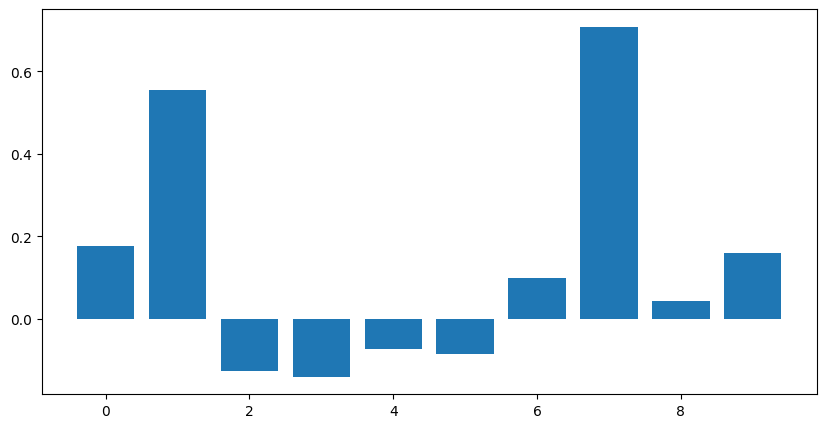

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x1000 with 0 Axes>

In [53]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [54]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [55]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(TOP_NIFTY_2024)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [56]:

class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [57]:
%%time
problem = PortfolioProblem(mu, cov)
algorithm = NSGA2(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: user 13.7 s, sys: 14.8 ms, total: 13.8 s
Wall time: 13.9 s


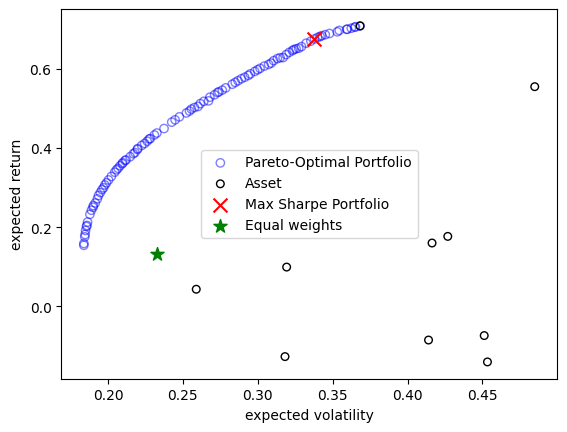

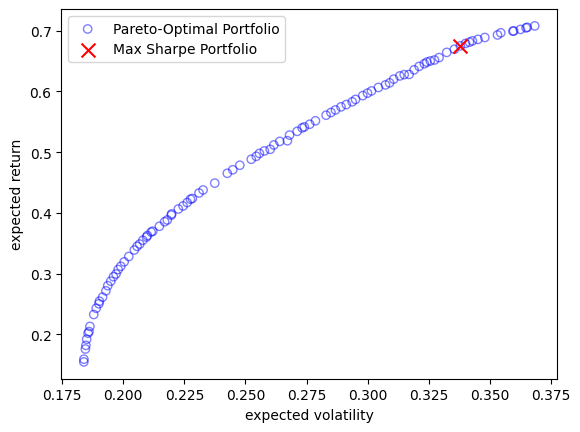

In [58]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(TOP_NIFTY_2024), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [59]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
PERSISTENT.NS 0.798222154751599
COFORGE.NS 0.1968397797205235
AUBANK.NS 0.004938065527877557
EXIDEIND.NS 0.0
FEDERALBNK.NS 0.0
IDFCFIRSTB.NS 0.0
INDHOTEL.NS 0.0
LUPIN.NS 0.0
POWERGRID.NS 0.0
RECLTD.NS 0.0


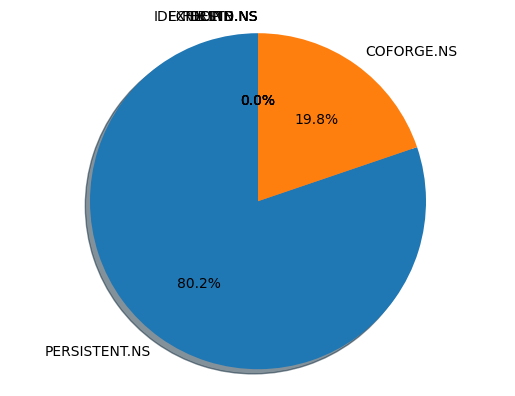

In [60]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)

fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [61]:
x = np.zeros((len(TOP_NIFTY_2024), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.13185373716276977
Volatility =  0.2324696096046631


In [62]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.6752102017630504
Volatility =  0.33789066094359677


## Solve problem with SMS-EMOA

In [63]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(TOP_NIFTY_2024)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [64]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [65]:
%%time
problem = PortfolioProblem(mu, cov)

algorithm = SMSEMOA(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: user 4.49 s, sys: 12.9 ms, total: 4.5 s
Wall time: 4.56 s


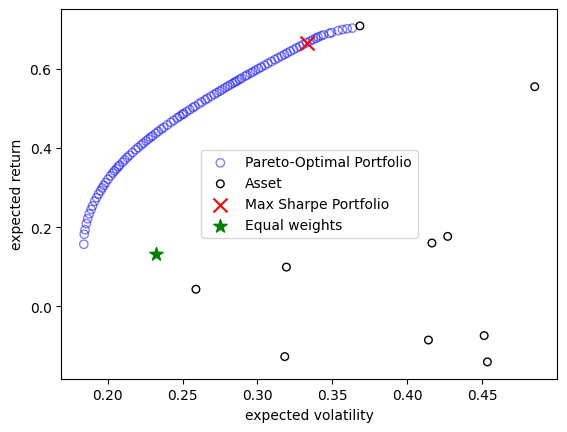

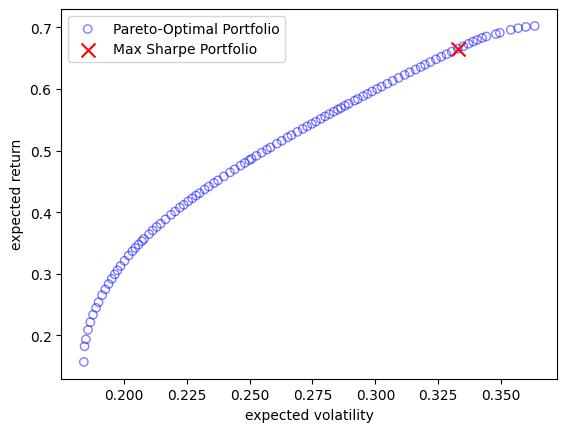

In [66]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(TOP_NIFTY_2024), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [67]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
PERSISTENT.NS 0.7865616478866398
COFORGE.NS 0.18757472300083258
AUBANK.NS 0.025863629112527563
EXIDEIND.NS 0.0
FEDERALBNK.NS 0.0
IDFCFIRSTB.NS 0.0
INDHOTEL.NS 0.0
LUPIN.NS 0.0
POWERGRID.NS 0.0
RECLTD.NS 0.0


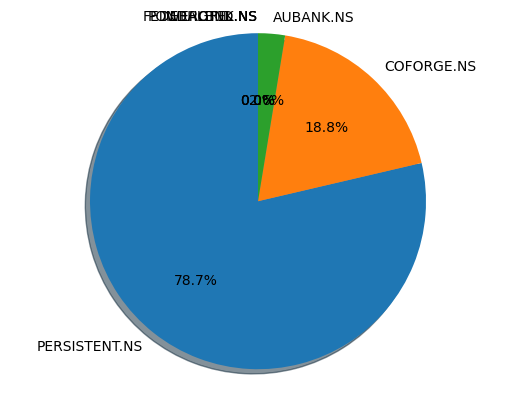

In [68]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)

fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [69]:
x = np.zeros((len(TOP_NIFTY_2024), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.13185373716276977
Volatility =  0.2324696096046631


In [70]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.6655173207343134
Volatility =  0.33280812613080657


In [44]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html Project_codes.ipynb

[NbConvertApp] WARNING | pattern 'Project_codes.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 